In [1]:
import os
import pandas as pd
import numpy as np
import plotnine
from datetime import date
import scipy
import seaborn as sns
from Bio import SeqIO
import matplotlib.pyplot as plt
from upsetplot import from_memberships

In [2]:
## GLOBAL PARAMETERS ##
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_trials_September21"
eukulele_dir_designer = "EUKulele_designer"
eukulele_dir_CAG = "EUKulele_07-CAG"
eukulele_dir_MAD = "EUKulele_12-MAD"
salmon_dir = os.path.join(base_dir,"08-salmon_mapping")

In [3]:
jeukebox_dirs = [curr for curr in os.listdir(base_dir) if "jEUKebox" in curr]
all_number_proteins_merged = pd.DataFrame()

def create_set(x):
    x = x.dropna()
    y = []
    [y.extend(curr.split("-")) for curr in x]
    return "-".join(sorted(list(set(y))))

def count_set(x):
    x = x.dropna()
    y = []
    [y.extend(curr.split("-")) for curr in x]
    try:
        len(sorted(list(set(y))))
    except: 
        print(y,flush=True)
    return len(sorted(list(set(y))))

for jeukebox_dir in jeukebox_dirs:
    sourmash_file = os.path.join(base_dir, jeukebox_dir, "sourmash_MMETSP", "all.csv")
    if os.path.isfile(sourmash_file):
        
        if not os.path.isdir(os.path.join(base_dir, jeukebox_dir, 
                             "sourmash_MMETSP")):
            continue
        prot_clust_dir = os.path.join(base_dir, jeukebox_dir,
                                      "eukrhythmic_assembly",
                                      "intermediate-files",
                                      "03-merge", "07-CAG")
        prot_proteins_clust_dir = os.path.join(base_dir, jeukebox_dir,
                                      "eukrhythmic_assembly",
                                      "intermediate-files",
                                      "04-compare", "08-CAG-proteins")
        if not os.path.isdir(prot_clust_dir):
            continue
            
        print(jeukebox_dir,"is ready to go.",flush=True)
        cluster_results = pd.DataFrame()
        for sim_file in os.listdir(prot_clust_dir):
            if "tsv" not in sim_file:
                continue
            fasta_file=sim_file.split(".tsv")[0] + ".fasta"
            ## WHAT'S INSIDE THE CAG FINAL CONTIGS??
            cluster_result = pd.read_csv(os.path.join(prot_clust_dir,
                                                      sim_file),sep="\t",
                                        header=None,names=["Representative","Member"])
            comm_num = int(sim_file.split("_merged")[0].split("_")[-1])
            cluster_result["Community"] = int(sim_file.split("_merged")[0].split("_")[-1])
            cluster_result["Name"] = jeukebox_dir
            cluster_result["Assembler_Rep"] = [curr.split("_")[0] for curr in cluster_result.Representative]
            cluster_result["Assembler_Mem"] = [curr.split("_")[0] for curr in cluster_result.Member]
            
            cluster_result = cluster_result.groupby(["Community","Name",
                                                     "Representative",
                                                     "Assembler_Rep"]).agg({"Assembler_Mem": [count_set,
                                                                                                create_set]}).reset_index()
            cluster_result.columns = [' '.join(col).strip() for col in cluster_result.columns.values]
            comm_num = int(sim_file.split("_merged")[0].split("_")[-1])
            cluster_result["Community"] = int(sim_file.split("_merged")[0].split("_")[-1])
            cluster_result["Name"] = jeukebox_dir
            list_ids = [curr.id for curr in SeqIO.parse(os.path.join(prot_proteins_clust_dir,
                                                                     "sim_raw_reads_" + \
                                                                     str(comm_num) + \
                                                                     "_CAG.fasta.transdecoder.pep"),
                                                        "fasta")]
            
            list_lengths = [len(curr.seq) for curr in SeqIO.parse(os.path.join(prot_proteins_clust_dir,
                                                                     "sim_raw_reads_" + \
                                                                     str(comm_num) + \
                                                                     "_CAG.fasta.transdecoder.pep"),
                                                        "fasta")]
            
            source_contig = [curr.split(".")[0].split("sim_raw_reads_" + str(comm_num) + "_")[-1] for curr in list_ids]
            cluster_result["RepresentativeFix"] = [curr.split(".")[0].split("sim_raw_reads_" + str(comm_num) + "_")[-1] \
                              for curr in cluster_result.Representative]
            protein_numbers = [curr.split(".")[-1] for curr in list_ids]
            
            protein_df = pd.DataFrame({"Source": source_contig, "ProteinNumber": protein_numbers,
                                       "Length": list_lengths})
            counted_proteins = protein_df.groupby("Source").agg({"ProteinNumber":"count",
                                                                 "Length":"mean"}).reset_index()
            
            number_proteins_merged = pd.merge(cluster_result,counted_proteins,
                                              left_on="RepresentativeFix",right_on="Source",how="left")
            
            number_proteins_merged.loc[number_proteins_merged.ProteinNumber != \
                                       number_proteins_merged.ProteinNumber,"ProteinNumber"] = 0
            all_number_proteins_merged = pd.concat([all_number_proteins_merged,number_proteins_merged])

jEUKebox-Trial3-CommB is ready to go.
jEUKebox-Trial2-CommB is ready to go.
jEUKebox-Trial4-100k is ready to go.
jEUKebox-Trial2-100k is ready to go.
jEUKebox-Trial1-CommB is ready to go.
jEUKebox-Trial3-100k is ready to go.
jEUKebox-Trial1-100k is ready to go.
jEUKebox-Trial4-CommB is ready to go.


In [37]:
jeukebox_dirs = [curr for curr in os.listdir(base_dir) if "jEUKebox" in curr]
all_number_proteins_designer = pd.DataFrame()

def create_set(x):
    x = x.dropna()
    y = []
    [y.extend(curr.split("-")) for curr in x]
    return "-".join(sorted(list(set(y))))

def count_set(x):
    x = x.dropna()
    y = []
    [y.extend(curr.split("-")) for curr in x]
    try:
        len(sorted(list(set(y))))
    except: 
        print(y,flush=True)
    return len(sorted(list(set(y))))

for jeukebox_dir in jeukebox_dirs:
    sourmash_file = os.path.join(base_dir, jeukebox_dir, "sourmash_MMETSP", "all.csv")
    if os.path.isfile(sourmash_file):
        
        if not os.path.isdir(os.path.join(base_dir, jeukebox_dir, 
                             "sourmash_MMETSP")):
            continue
        prot_proteins_clust_dir = os.path.join(base_dir, jeukebox_dir,
                                      "11-assembly_transdecoded")
        designer_assembly_dir = os.path.join(base_dir, jeukebox_dir,
                                      "06-designer_assemblies")
        if not os.path.isdir(prot_clust_dir):
            continue
            
        print(jeukebox_dir,"is ready to go.",flush=True)
        cluster_results = pd.DataFrame()
        for sim_file in os.listdir(prot_proteins_clust_dir):
            if "pep" not in sim_file:
                continue
            comm_num = int(sim_file.split(".fasta")[0].split("_")[-1])
            list_ids = [curr.id for curr in SeqIO.parse(os.path.join(prot_proteins_clust_dir,
                                                                     sim_file),
                                                        "fasta")]
            source_contig = [curr.split(".")[0].split("sim_raw_reads_" + str(comm_num) + "_")[-1] for curr in list_ids]
            list_ids_all = [curr.id for curr in SeqIO.parse(os.path.join(designer_assembly_dir,
                                                                     sim_file.split(".")[0] + ".fasta"),
                                                        "fasta")]
            
            
            list_lengths = [len(curr.seq) for curr in SeqIO.parse(os.path.join(prot_proteins_clust_dir,
                                                                     sim_file),
                                                        "fasta")]
            
            extras_len = len(list(set(list_ids_all) - set(source_contig)))
            protein_numbers = [curr.split(".")[-1] for curr in list_ids] + [np.nan] * extras_len
            list_ids = list_ids + list(set(list_ids_all) - set(source_contig))
            list_lengths = list_lengths + [0] * extras_len
            print(len(list_lengths),flush=True)
            print(len(list_ids),flush=True)
            
            source_contig = [curr.split(".")[0].split("sim_raw_reads_" + str(comm_num) + "_")[-1] for curr in list_ids]
            
            protein_df = pd.DataFrame({"Source": source_contig, "ProteinNumber": protein_numbers,
                                       "Length": list_lengths, "jEUKebox": jeukebox_dir,
                                       "Community": comm_num})
            counted_proteins = protein_df.groupby(["Source","jEUKebox",
                                                   "Community"]).agg({"ProteinNumber":"count",
                                                                 "Length":"mean"}).reset_index()
            
            number_proteins_merged = counted_proteins
            number_proteins_merged["RepresentativeFix"] = number_proteins_merged["Source"]
            
            number_proteins_merged.loc[number_proteins_merged.ProteinNumber != \
                                       number_proteins_merged.ProteinNumber,"ProteinNumber"] = 0
            all_number_proteins_designer = pd.concat([all_number_proteins_designer,number_proteins_merged])

jEUKebox-Trial3-CommB is ready to go.
64095
64095
77882
77882
71789
71789
65800
65800
58290
58290
62213
62213
jEUKebox-Trial2-CommB is ready to go.
68811
68811
64520
64520
56255
56255
51202
51202
56560
56560
65492
65492
jEUKebox-Trial4-100k is ready to go.
66860
66860
71459
71459
61335
61335
56093
56093
66349
66349
80109
80109
jEUKebox-Trial2-100k is ready to go.
76953
76953
79569
79569
55664
55664
76212
76212
53035
53035
71088
71088
jEUKebox-Trial1-CommB is ready to go.
85257
85257
83607
83607
57850
57850
79777
79777
71219
71219
81212
81212
jEUKebox-Trial3-100k is ready to go.
80394
80394
79183
79183
69483
69483
72254
72254
62838
62838
77381
77381
jEUKebox-Trial1-100k is ready to go.
55643
55643
77139
77139
64619
64619
72380
72380
63393
63393
79917
79917
jEUKebox-Trial4-CommB is ready to go.
63185
63185
64911
64911
64073
64073
65314
65314
48545
48545
80376
80376


In [41]:
all_number_proteins_designer[all_number_proteins_designer.ProteinNumber == 0]

,Source,jEUKebox,Community,ProteinNumber,Length,RepresentativeFix
0,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...,jEUKebox-Trial3-CommB,4,0,0.0,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...
2,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...,jEUKebox-Trial3-CommB,4,0,0.0,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...
4,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...,jEUKebox-Trial3-CommB,4,0,0.0,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...
7,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...,jEUKebox-Trial3-CommB,4,0,0.0,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...
8,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...,jEUKebox-Trial3-CommB,4,0,0.0,gnl|Aplanochytrium_stocchinoi_Strain_GSBS06|MM...
...,...,...,...,...,...,...
53412,gnl|Thalassiosira_weissflogii_Strain_CCMP1010|...,jEUKebox-Trial4-CommB,1,0,0.0,gnl|Thalassiosira_weissflogii_Strain_CCMP1010|...
56254,gnl|Thalassiosira_weissflogii_Strain_CCMP1010|...,jEUKebox-Trial4-CommB,1,0,0.0,gnl|Thalassiosira_weissflogii_Strain_CCMP1010|...
56320,gnl|Thalassiosira_weissflogii_Strain_CCMP1010|...,jEUKebox-Trial4-CommB,1,0,0.0,gnl|Thalassiosira_weissflogii_Strain_CCMP1010|...
57238,gnl|Thalassiosira_weissflogii_Strain_CCMP1010|...,jEUKebox-Trial4-CommB,1,0,0.0,gnl|Thalassiosira_weissflogii_Strain_CCMP1010|...


In [51]:
all_number_proteins_designer.groupby(["jEUKebox","ProteinNumber"])["Source"].count()

## need to read in all the cluster members for designer so that we can gauge the zeros!!!!

jEUKebox               ProteinNumber
jEUKebox-Trial1-100k   0                  4050
                       1                215538
                       2                 58534
                       3                 15507
                       4                  4481
                                         ...  
jEUKebox-Trial4-CommB  8                    63
                       9                    25
                       10                   15
                       14                    1
                       15                    3
Name: Source, Length: 143, dtype: int64

In [52]:
all_number_proteins_designer.to_csv(os.path.join("..","data-output", 
                                    "all_number_proteins_designer." + str(date.today()) + ".csv"))

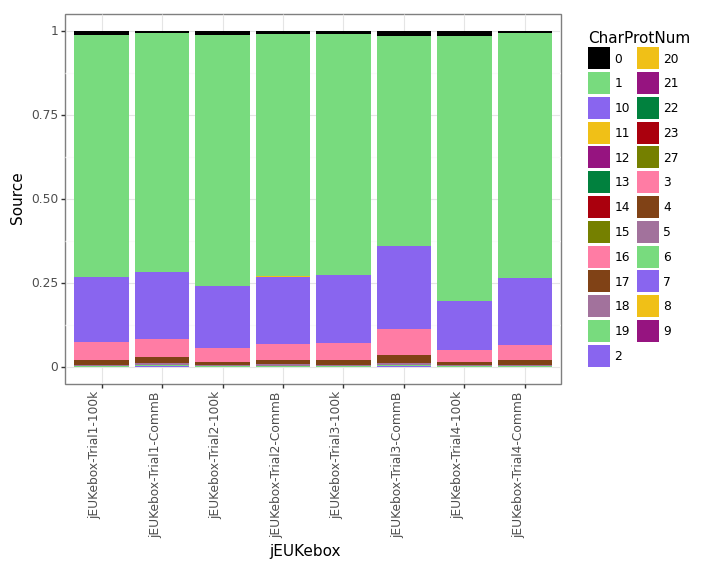

<ggplot: (2932423280472)>

In [50]:
all_number_proteins_designer["CharProtNum"] = [str(curr) for curr in all_number_proteins_designer.ProteinNumber]
(plotnine.ggplot(all_number_proteins_designer.groupby(["jEUKebox",
                                                       "ProteinNumber",
                                                       "CharProtNum"])["Source"].count().reset_index()) + 
     plotnine.geom_bar(plotnine.aes(x="jEUKebox",fill="CharProtNum",y="Source"),
                       stat="identity",position="fill") + 
     plotnine.theme_bw()+ 
     plotnine.scale_fill_manual(values=["black","#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c",
                                       "#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c","#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c"])  + 
     #plotnine.scale_fill_gradient(low="blue", high="red", name = "Number of Contigs") + 
     plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

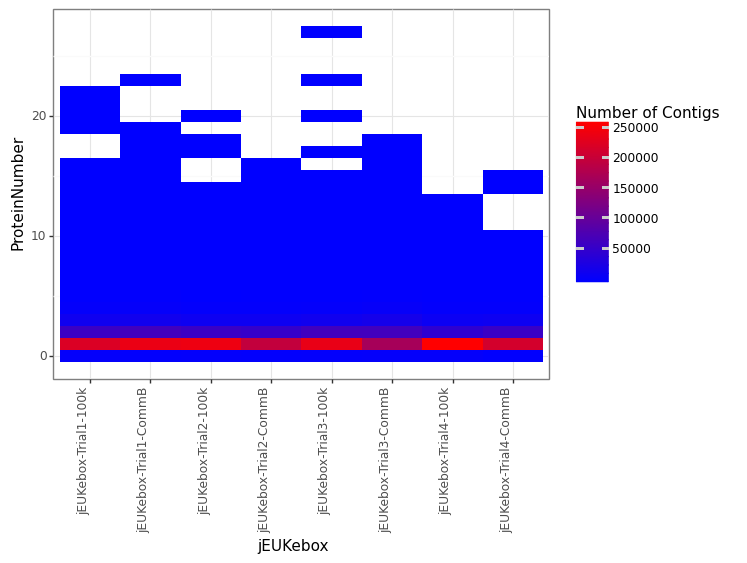

<ggplot: (2932320748225)>

In [44]:
(plotnine.ggplot(all_number_proteins_designer.groupby(["jEUKebox",
                                                       "ProteinNumber"])["Source"].count().reset_index()) + 
     plotnine.geom_tile(plotnine.aes(x="jEUKebox",y="ProteinNumber",fill="Source")) + 
     plotnine.theme_bw()+ 
     plotnine.scale_fill_gradient(low="blue", high="red", name = "Number of Contigs") + 
     plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

In [4]:
all_number_proteins_merged.loc[all_number_proteins_merged.ProteinNumber != \
                               all_number_proteins_merged.ProteinNumber,"ProteinNumber"] = 0

In [5]:
length_catalog = all_number_proteins_merged.groupby(["ProteinNumber","Assembler_Mem create_set"])["Length"].\
    agg(["mean","std"]).reset_index()

In [6]:
length_catalog["max_mean"] = length_catalog["mean"] + length_catalog["std"]
length_catalog["min_mean"] = length_catalog["mean"] - length_catalog["std"]

/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 15 rows containing missing values.
/vortexfs1/home/akrinos/.conda/envs/scplotenv/lib/python3.8/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_errorbar : Removed 39 rows containing missing values.


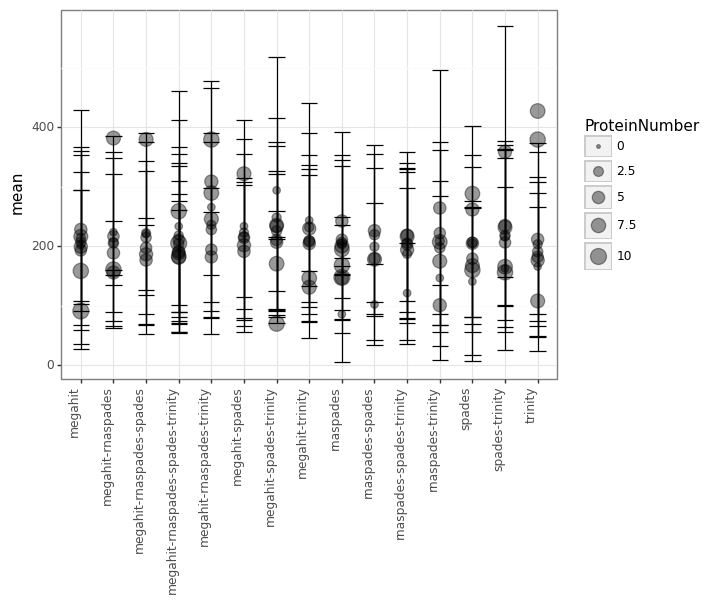

<ggplot: (2932320317239)>

In [7]:
(plotnine.ggplot(length_catalog) + \
     plotnine.geom_point(plotnine.aes(x = "Assembler_Mem create_set",
                                    y = "mean", size = "ProteinNumber"),color="black",alpha=0.4) + 
     plotnine.geom_errorbar(plotnine.aes(x = "Assembler_Mem create_set",
                                    ymin = "min_mean", ymax="max_mean"),color="black") + 
    plotnine.theme_bw() + plotnine.xlab("") + 
    plotnine.scale_fill_gradientn(name="No. Proteins",colors=["#1E9600","#FFF200","#3b8d99"]) + 
    plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

In [54]:
all_number_proteins_merged.to_csv(os.path.join("..","data-output", 
                                    "all_number_proteins_merged." + str(date.today()) + ".csv"))

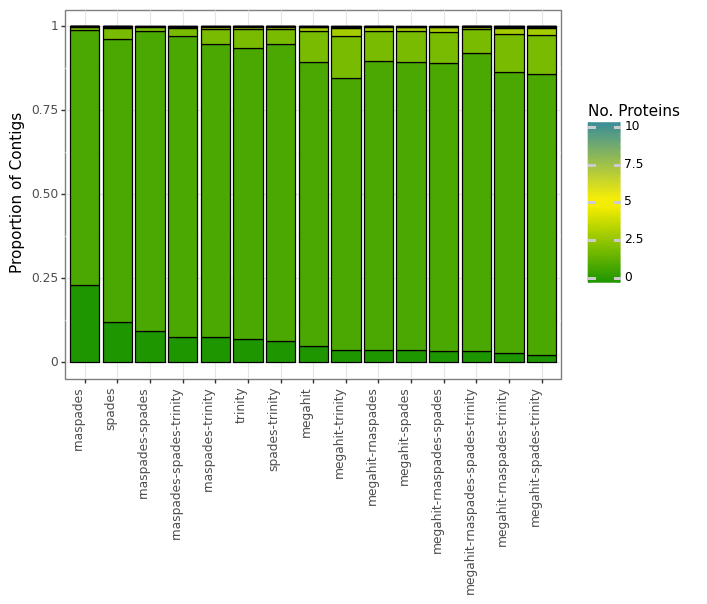

<ggplot: (2932320974147)>

In [8]:
prot_merg_ct = all_number_proteins_merged.groupby(["Assembler_Mem create_set",
                                    "ProteinNumber"])["Assembler_Rep"].count().reset_index()

combinall = all_number_proteins_merged.groupby("Assembler_Mem create_set")["ProteinNumber"].count().reset_index()

combinone = all_number_proteins_merged[all_number_proteins_merged.ProteinNumber\
                                       == 0].groupby("Assembler_Mem create_set")["ProteinNumber"].count().reset_index()
combinall = pd.merge(combinall,combinone,left_on="Assembler_Mem create_set",
                     right_on="Assembler_Mem create_set")
combinall["Ratio"] = combinall["ProteinNumber_x"] / combinall["ProteinNumber_y"]
combinall = combinall.sort_values("Ratio",ascending=True)
prot_merg_ct["AssemblerGroup"] = pd.Categorical(
    prot_merg_ct["Assembler_Mem create_set"], categories=combinall["Assembler_Mem create_set"], ordered=True
)
#prot_merg_ct.ProteinNumber = prot_merg_ct.ProteinNumber.astype(str)
(plotnine.ggplot(prot_merg_ct) + \
     plotnine.geom_bar(plotnine.aes(x = "AssemblerGroup",
                                    y = "Assembler_Rep", fill = "ProteinNumber"),
                       stat="identity",position="fill",color="black") + 
    plotnine.ylab("Proportion of Contigs") + 
    plotnine.theme_bw() + plotnine.xlab("") + 
    plotnine.scale_fill_gradientn(name="No. Proteins",colors=["#1E9600","#FFF200","#3b8d99"]) + 
    plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

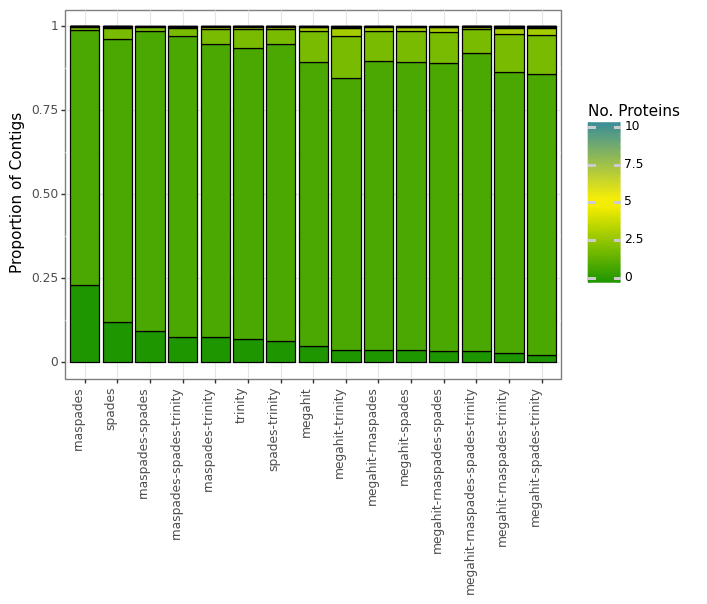

<ggplot: (2932322643607)>

In [9]:
prot_merg_ct = all_number_proteins_merged.groupby(["Assembler_Mem create_set",
                                    "ProteinNumber"])["Assembler_Rep"].count().reset_index()

combinall = all_number_proteins_merged.groupby("Assembler_Mem create_set")["ProteinNumber"].count().reset_index()

combinone = all_number_proteins_merged[all_number_proteins_merged.ProteinNumber\
                                       == 0].groupby("Assembler_Mem create_set")["ProteinNumber"].count().reset_index()
combinall = pd.merge(combinall,combinone,left_on="Assembler_Mem create_set",
                     right_on="Assembler_Mem create_set")
combinall["Ratio"] = combinall["ProteinNumber_x"] / combinall["ProteinNumber_y"]
combinall = combinall.sort_values("Ratio",ascending=True)
prot_merg_ct["AssemblerGroup"] = pd.Categorical(
    prot_merg_ct["Assembler_Mem create_set"], categories=combinall["Assembler_Mem create_set"], ordered=True
)
#prot_merg_ct.ProteinNumber = prot_merg_ct.ProteinNumber.astype(str)
(plotnine.ggplot(prot_merg_ct) + \
     plotnine.geom_bar(plotnine.aes(x = "AssemblerGroup",
                                    y = "Assembler_Rep", fill = "ProteinNumber"),
                       stat="identity",position="fill",color="black") + 
    plotnine.ylab("Proportion of Contigs") + 
    plotnine.theme_bw() + plotnine.xlab("") + 
    plotnine.scale_fill_gradientn(name="No. Proteins",colors=["#1E9600","#FFF200","#3b8d99"]) + 
    plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

In [10]:
prot_merg_ct.to_csv(os.path.join("..","data-output", 
                                    "prot_merg_ct." + str(date.today()) + ".csv"))

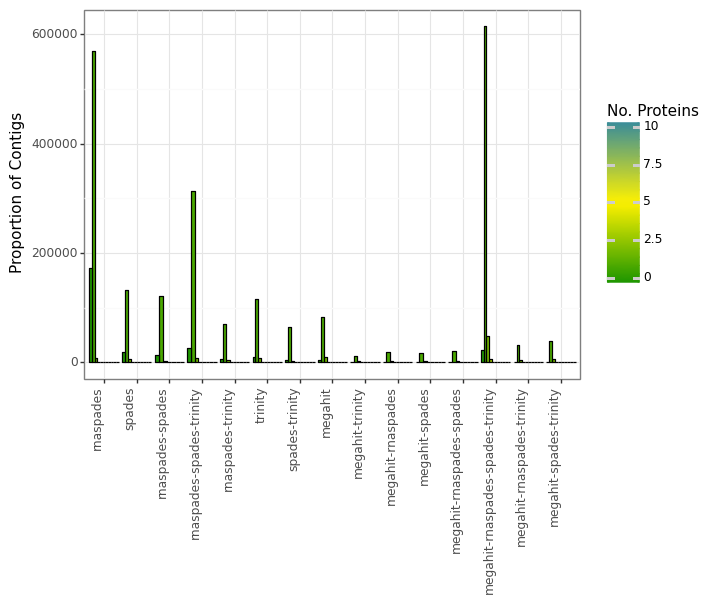

<ggplot: (2932378318716)>

In [62]:
(plotnine.ggplot(prot_merg_ct) + \
     plotnine.geom_bar(plotnine.aes(x = "AssemblerGroup",
                                    y = "Assembler_Rep", fill = "ProteinNumber", group = "ProteinNumber"),
                       stat="identity",position="dodge",color="black") + 
    plotnine.ylab("Proportion of Contigs") + 
    plotnine.theme_bw() + plotnine.xlab("") + 
    plotnine.scale_fill_gradientn(name="No. Proteins",colors=["#1E9600","#FFF200","#3b8d99"]) + 
    plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

In [52]:
combinall

,Assembler_Mem create_set,ProteinNumber_x,ProteinNumber_y
0,megahit,98637,83293
1,megahit-rnaspades,22842,19641
2,megahit-rnaspades-spades,23304,19935
3,megahit-rnaspades-spades-trinity,692240,614923
4,megahit-rnaspades-trinity,38628,32294
5,megahit-spades,18849,16155
6,megahit-spades-trinity,46033,38404
7,megahit-trinity,13482,10920
8,rnaspades,750646,569121
9,rnaspades-spades,136787,122199


In [11]:
all_number_proteins_merged.head()

,Community,Name,Representative,Assembler_Rep,Assembler_Mem count_set,Assembler_Mem create_set,Source,ProteinNumber
0,2,jEUKebox-Trial3-CommB,megahit_sim_raw_reads_2_k51_10002,megahit,1,megahit,megahit_sim_raw_reads_2_k51_10002,1.0
1,2,jEUKebox-Trial3-CommB,megahit_sim_raw_reads_2_k51_10012,megahit,1,megahit,megahit_sim_raw_reads_2_k51_10012,1.0
2,2,jEUKebox-Trial3-CommB,megahit_sim_raw_reads_2_k51_1002,megahit,1,megahit,megahit_sim_raw_reads_2_k51_1002,1.0
3,2,jEUKebox-Trial3-CommB,megahit_sim_raw_reads_2_k51_10030,megahit,2,megahit-trinity,megahit_sim_raw_reads_2_k51_10030,1.0
4,2,jEUKebox-Trial3-CommB,megahit_sim_raw_reads_2_k51_10042,megahit,1,megahit,megahit_sim_raw_reads_2_k51_10042,2.0
